# encoding steganography code:

In [1]:
# importing openCV for image processing and numpy for numerical operations
import cv2
import numpy as np

# reading input image
image = cv2.imread('pic1.jpg')
plain_text = "name to ramz mishavad#"
binary_plain_text = list()
counter = 0

for i in range(len(plain_text) - 1, -1, -1):
    # converts into its Unicode code point
    temp = ord(plain_text[i])
    #convert the unicode to binary and store it in reversed oreder
    for _ in range(8):
        binary_plain_text.append(temp % 2)
        temp //= 2
binary_plain_text = list(reversed(binary_plain_text))

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if(counter == len(binary_plain_text)):
            break
        for k in range(image.shape[2]):
            # calculate the difference between the LSB of the pixel value and the next bit of the binary plaintext message.
            # then xor it with the original pixel value
            image[i, j, k] ^= abs(binary_plain_text[counter] - (image[i, j, k] & 1))
        counter += 1

cv2.imwrite('Encoded.png', image)


True

# decoding steganography code:

In [2]:
import cv2
import numpy as np


image = cv2.imread('Encoded.png')
plain_text = ""

def solve(image, plain_text):
    counter, binary_char = 0, 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if counter == 8:
                plain_text += chr(binary_char)
                # the end of text character
                if(chr(binary_char) == '#'):
                    return plain_text
                counter, binary_char = 0, 0
            # building binary number based on digits
            binary_char = binary_char * 2 + (image[i, j, 0] & 1)
            counter += 1

print(solve(image, plain_text))


name to ramz mishavad#


In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

drive.mount('/content/drive')

# SOURCE_DIR = "/content/drive/MyDrive/Uni/"

# Define the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Uni/security_hw3/archive/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Uni/security_hw3/archive/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5
)

# Test the model
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Uni/security_hw3/archive/test',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

predictions = model.predict(test_generator)

counter, ans = 0, 0
for i, image_path in enumerate(test_generator.filenames):
    prediction = predictions[i][0]
    if prediction > 0.5:
        if (counter % 2) == 1:
            ans += 1
    else:
        if (counter % 2) == 0:
            ans += 1
    counter += 1
print(ans)

Mounted at /content/drive
Found 3248 images belonging to 2 classes.
Found 812 images belonging to 2 classes.
Epoch 1/10
101/101 [==============================] - 817s 8s/step - loss: 0.7241 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 2/10
101/101 [==============================] - 20s 198ms/step - loss: 0.6932 - accuracy: 0.5037 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 3/10
101/101 [==============================] - 20s 193ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 4/10
101/101 [==============================] - 20s 200ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6931 - val_accuracy: 0.5075
Epoch 5/10
101/101 [==============================] - 21s 203ms/step - loss: 0.6932 - accuracy: 0.5047 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 6/10
101/101 [==============================] - 20s 201ms/step - loss: 0.6931 - accuracy: 0.5050 - val_loss: 0.6931 - val_accuracy: 0.5038
Epoch 7/10
101/101 [===

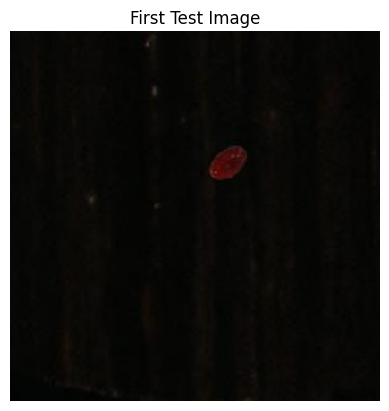

Prediction for the first test image: 0.50466865


In [4]:
import matplotlib.pyplot as plt

# Get the first test image and its prediction
first_test_image = test_generator[0][0][0]  # Get the first image from the first batch
first_prediction = predictions[0][0]  # Get the prediction for the first image

# Plot the first test image
plt.imshow(first_test_image)
plt.title('First Test Image')
plt.axis('off')
plt.show()

# Print the prediction
print("Prediction for the first test image:", first_prediction)


In [12]:
from PIL import Image

def transparent(image_path, watermark_path, position):

    image = Image.open(image_path)
    watermark = Image.open(watermark_path).convert("RGBA")

    # Resize the watermark image to fit the specified position
    watermark = watermark.resize((position[2] - position[0], position[3] - position[1]))

    # Create a transparent layer
    transparent_layer = Image.new("RGBA", image.size, (0, 0, 0, 0))

    # Paste the watermark onto the transparent layer at the specified position
    transparent_layer.paste(watermark, position, mask=watermark)

    # Combine the original image with the transparent layer using alpha compositing
    watermarked_image = Image.alpha_composite(image.convert("RGBA"), transparent_layer)

    watermarked_image.save("watermarked_image.png")

# Example usage
image_path = "original_image.jpg"
watermark_path = "IUST.png"
position = (370, 20, 450, 100)

transparent(image_path, watermark_path, position)
